# Develop an image caption generator model using Tensorflow-keras

In this assignment, you will have to train a caption generator model for images. It requires a CNN model to extract the content of images and an RNN model to learn the corresponding captions of the images. These two features are finally merged and trained using dense layers.

The below research papers are for your reference-
1. [Where to put the Image in an Image Caption Generator](https://arxiv.org/abs/1703.09137)
2. [Framing Image Description as a Ranking Task: Data, Models and Evaluation Metrics](https://www.ijcai.org/Proceedings/15/Papers/593.pdf) 

This notebook is divided into six parts. Total : [20 Marks]

1. Download photo and caption dataset [0 Mark]
2. Prepare photo data [2 Marks]
3. Prepare text data [4 Marks]
4. Develop deep learning model with progressive data loading [8 Marks]
5. Evaluate model [4 Marks]
6. Generate new captions [2 Marks]

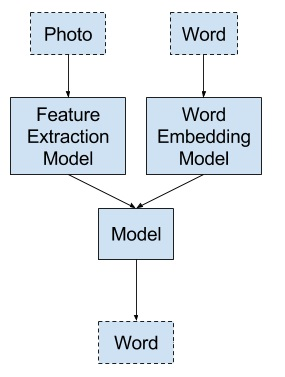

In [0]:
from IPython.display import Image
Image(filename='Model-Generate-Word-From-Word.jpg')

# 1. Download photo and caption dataset [0 Mark]

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [2]:
!ls -l /gdrive/My\ Drive
root = '/gdrive/My Drive/'


total 853
-rw------- 1 root root 164256 May 11 19:31  Assignment_2_BITS_DL_8.ipynb
drwx------ 2 root root   4096 May 12 10:39  Flicker8k_Dataset
drwx------ 2 root root   4096 May 12 16:27  Flicker8k_Dataset_small
drwx------ 2 root root   4096 May 12 10:12  Flickr8k_text
-rw------- 1 root root 696774 Nov 14  2018 'Getting started.pdf'


In [3]:
ls -l /gdrive/My\ Drive/Flickr8k_text

total 9879
-rw------- 1 root root 2918552 May 12 10:13 CrowdFlowerAnnotations.txt
-rw------- 1 root root  346674 Oct 14  2013 ExpertAnnotations.txt
-rw------- 1 root root   25801 Oct 10  2013 Flickr_8k.devImages.txt
-rw------- 1 root root 3244761 May 12 10:14 Flickr8k.lemma.token.txt
-rw------- 1 root root   25775 Oct 10  2013 Flickr_8k.testImages.txt
-rw------- 1 root root 3395237 Oct 14  2013 Flickr8k.token.txt
-rw------- 1 root root  154678 Oct 10  2013 Flickr_8k.trainImages.txt
-rw------- 1 root root    1821 Oct 14  2013 readme.txt


In [4]:
ls /gdrive/My\ Drive/Flicker8k_Dataset | wc -l

8096


# 2. Prepare photo data [1 Mark]

In [0]:
from os import listdir
from pickle import dump

# You need to import the following functions from tensorflow.keras library
# VGG16, load_img, img_to_array, preprocess_input, Model

#####
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model


In [6]:
# function to extract features from each photo in the directory
def extract_features(directory):
	# load the VGG16 model
	model = VGG16()

  # Print the model summary to understand the model
	#print(model.summary())

	# re-structure the model by removing the last layer
	#####
	model = Model(inputs=model.inputs, outputs=model.layers[-2].output)
	# summarize
	#print(model.summary())
  
	# extract features from each photo in a dictionary
	features = dict()
	i=0
	# iterate over all the files of the dataset directory
	for name in listdir(directory):
		
		filename = directory + '/' + name

		# load the image from filename with target size of (224,224)
		image = load_img(filename, target_size=(224, 224))
    
		# convert the image pixels to a numpy array
		image = img_to_array(image)

		# reshape data for the model
		image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

		# preprocess the image for the VGG model	
		image = preprocess_input(image)
    
		# get features (output of the model for the image)
		feature = model.predict(image, verbose=0)

		# get image id
		image_id = name.split('.')[0]
		
		# store feature in the features dictionary with image_id as key and feature as value
		features[image_id] = feature
		i = i+1
		print('Features extracted: %d' % i)

	return features

# extract features from all images
directory = root+'Flicker8k_Dataset'
features = extract_features(directory)
print('Extracted Features: %d' % len(features))

# save to file
dump(features, open('features.pkl', 'wb'))

Streaming output truncated to the last 5000 lines.
Features extracted: 3099
Features extracted: 3100
Features extracted: 3101
Features extracted: 3102
Features extracted: 3103
Features extracted: 3104
Features extracted: 3105
Features extracted: 3106
Features extracted: 3107
Features extracted: 3108
Features extracted: 3109
Features extracted: 3110
Features extracted: 3111
Features extracted: 3112
Features extracted: 3113
Features extracted: 3114
Features extracted: 3115
Features extracted: 3116
Features extracted: 3117
Features extracted: 3118
Features extracted: 3119
Features extracted: 3120
Features extracted: 3121
Features extracted: 3122
Features extracted: 3123
Features extracted: 3124
Features extracted: 3125
Features extracted: 3126
Features extracted: 3127
Features extracted: 3128
Features extracted: 3129
Features extracted: 3130
Features extracted: 3131
Features extracted: 3132
Features extracted: 3133
Features extracted: 3134
Features extracted: 3135
Features extracted: 3136

In [7]:
# REFERENCE CODE
# You can reference this output to understand the feature dictionary variable

i = 0
for key, value in features.items():
  print("key: ", key, "value: ", value)
  i += 1
  if i==9:
    break

print(value.shape)
print(len(features))

key:  2474092890_6c0781a8ed value:  [[1.9167701  2.820439   0.72505444 ... 0.         4.095129   0.        ]]
key:  3120189281_1938460e85 value:  [[0.7948173 0.        2.7716985 ... 0.        6.0868697 0.       ]]
key:  3226796100_08c49cfa5c value:  [[0.         0.04009837 0.         ... 0.         3.2997937  1.5370014 ]]
key:  2695962887_a1647c567b value:  [[0. 0. 0. ... 0. 0. 0.]]
key:  3216901052_269ace7b3c value:  [[0.88462585 0.         0.79778147 ... 0.         0.3726354  2.7502291 ]]
key:  3264937930_9623496b64 value:  [[0.        0.        2.5311522 ... 5.325687  0.        0.       ]]
key:  3457210101_3533edebc8 value:  [[1.7561268 0.        0.        ... 0.        0.        3.171581 ]]
key:  3241965735_8742782a70 value:  [[0.43854058 3.607577   1.507893   ... 0.         0.7172942  1.5967948 ]]
key:  3215238223_29de2b35cb value:  [[0.        1.0109415 0.        ... 2.643682  0.        0.       ]]
(1, 4096)
8096


# 3. Prepare Text Data [2 Marks]

In [0]:
import string

# load doc into memory
def load_doc(filename):
	# open the file as read only
	file = open(filename, 'r')
	# read all text
	text = file.read()
	# close the file
	file.close()
	return text

In [0]:
# extract descriptions for images
def load_descriptions(doc):
	mapping = dict()
	# process lines
	for line in doc.split('\n'):
		# split line by white space
		tokens = line.split()
		if len(line) < 2:
			continue
		# take the first token as the image id, the rest as the description
		image_id, image_desc =  tokens[0], tokens[1:]

		# remove filename from image id
		image_id = image_id.split('.')[0]

		# convert description tokens back to string
		image_desc = ' '.join(image_desc)
	
		# create the list if needed
		if image_id not in mapping:
			mapping[image_id] = list()
	 
		# store description
		mapping[image_id].append(image_desc)
	
	return mapping

In [0]:
# We will clean the text in the following ways in order to reduce the size of the vocabulary of words we will need to work with:

# 1. Convert all words to lowercase.
# 2. Remove all punctuation.
# 3. Remove all words that are one character or less in length (e.g. ‘a’).
# 4. Remove all words with numbers in them.

def clean_descriptions(descriptions):
	
	# prepare translation table for removing punctuation
	table = str.maketrans('', '', string.punctuation)
	for key, desc_list in descriptions.items():
		for i in range(len(desc_list)):
			desc = desc_list[i]

			# tokenize desc using split 
			desc = desc.split()

			# convert all the words in desc to lower case
			desc = [word.lower() for word in desc]

			# remove punctuation from each token using translate function 
			# pass the "table" variable to this function
			desc = [w.translate(table) for w in desc]

			# remove hanging 's' and 'a'
			desc = [word for word in desc if len(word)>1]

			# remove tokens with numbers in them using isalpha
			desc = [word for word in desc if word.isalpha()]
			# store as string
			desc_list[i] =  ' '.join(desc)

In [0]:
# convert the loaded descriptions into a vocabulary of words
def to_vocabulary(descriptions):

	# build a list of all description strings
	all_desc = set()
	for key in descriptions.keys():
		[all_desc.update(d.split()) for d in descriptions[key]]
	return all_desc

In [0]:
# save descriptions to file, one per line
def save_descriptions(descriptions, filename):
	lines = list()
	for key, desc_list in descriptions.items():
		for desc in desc_list:
			lines.append(key + ' ' + desc)
	data = '\n'.join(lines)
	file = open(filename, 'w')
	file.write(data)
	file.close()

In [13]:
# Use the above functions in the code below-

filename = root+'Flickr8k_text/Flickr8k.token.txt'

# load descriptions (pass the filename)
doc = load_doc(filename)

# parse descriptions (pass doc)
descriptions = load_descriptions(doc)
print('Loaded: %d ' % len(descriptions))

# clean the descriptions
clean_descriptions(descriptions)

# summarize descriptions to a vocabulary of words
vocabulary = to_vocabulary(descriptions)
print('Vocabulary Size: %d' % len(vocabulary))

# save to file
save_descriptions(descriptions, 'descriptions.txt')

# You should get the following output for the above code

Loaded: 8092 
Vocabulary Size: 8763


# 4. Develop Deep Learning Model [4 Marks]

In [0]:
from numpy import array
from pickle import load

# You need to import the following functions from tensorflow.keras library
# Tokenizer, pad_sequences, to_categorical, plot_model, Model, Input, Dense, LSTM, Embedding, Dropout, add, ModelCheckpoint

#####
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import add
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model

In [0]:
# load a pre-defined list of photo identifiers
def load_set(filename):
	# load document filename using the function defined earlier
	doc = load_doc(filename)
	dataset = list()
 
	# process doc line by line using split
	for line in doc.split('\n'):
		# skip empty lines
		if len(line) < 1:
			continue
		# get the image identifier
		identifier = line.split('.')[0]
		dataset.append(identifier)
	return set(dataset)

# load clean descriptions into memory
def load_clean_descriptions(filename, dataset):
	# load document filename using function defined earlier
	doc = load_doc(filename)
	descriptions = dict()
 
  # process doc line by line using split
	for line in doc.split('\n'):
		# split line by white space
		tokens = line.split()

		# take the first token as the image id, the rest as the description
		image_id, image_desc = tokens[0], tokens[1:]
		
		# skip images not in the set
		if image_id in dataset:
			# create list
			if image_id not in descriptions:
				descriptions[image_id] = list()
			# wrap description in tokens
			desc = 'startseq ' + ' '.join(image_desc) + ' endseq'
			# store
			descriptions[image_id].append(desc)
	return descriptions

# load photo features
def load_photo_features(filename, dataset):
	# load all features from filename
	all_features = load(open(filename, 'rb'))

	# filter features
	features = {k: all_features.get(k,"none") for k in dataset}
	return features

# covert a dictionary of clean descriptions to a list of descriptions
def to_lines(descriptions):
	all_desc = list()
	for key in descriptions.keys():
		[all_desc.append(d) for d in descriptions[key]]
	return all_desc

# fit a tokenizer given caption descriptions
def create_tokenizer(descriptions):
	# Convert the descriptions to lines
	lines = to_lines(descriptions)
  
	# Create a tokenizer object
	tokenizer = Tokenizer()

	# fit the tokenizer using fit_on_texts on lines
	#####
	tokenizer.fit_on_texts(lines)

	return tokenizer

# calculate the length of the description with the most words
def max_length(descriptions):
	# Convert descriptions to lines
	lines = to_lines(descriptions)
	return max(len(d.split()) for d in lines)

In [0]:
# REFERENCE CODE
# X1,		    X2 (text sequence), 				                 		y (word)
# photo	    startseq, 									                    little
# photo	    startseq, little,						                   	girl
# photo	    startseq, little, girl, 			              		running
# photo	    startseq, little, girl, running, 		          	in
# photo	    startseq, little, girl, running, in, 		        field
# photo	    startseq, little, girl, running, in, field,     endseq

# You need to create the sequences in abovee format for your data

# create sequences of images, input sequences and output words for an image
def create_sequences(tokenizer, max_length, desc_list, photo, vocab_size):
	# Define as empty lists
  X1, X2, y = list(), list(), list()

	# walk through each description for the image
  for desc in desc_list:
		# encode the sequence using texts_to_sequences (consider first element)
    seq = tokenizer.texts_to_sequences([desc])[0]

		# split one sequence into multiple X,y pairs
    for i in range(1, len(seq)):
			# split into input and output pair as shown in reference code
      in_seq, out_seq = seq[:i], seq[i]
			# pad input sequence to max_length(consider first element)
      in_seq = pad_sequences([in_seq], maxlen=max_length)[0]
			# encode output sequence to one hot vectors with vocab size as num of classes (consider first element)
      out_seq = to_categorical([out_seq], num_classes=vocab_size)[0]
			# store
      X1.append(photo)
      X2.append(in_seq)
      y.append(out_seq)
  return array(X1), array(X2), array(y)

**You need to build a model with the following layers.
We have explained the inputs and outputs in the comments in the following cells.**

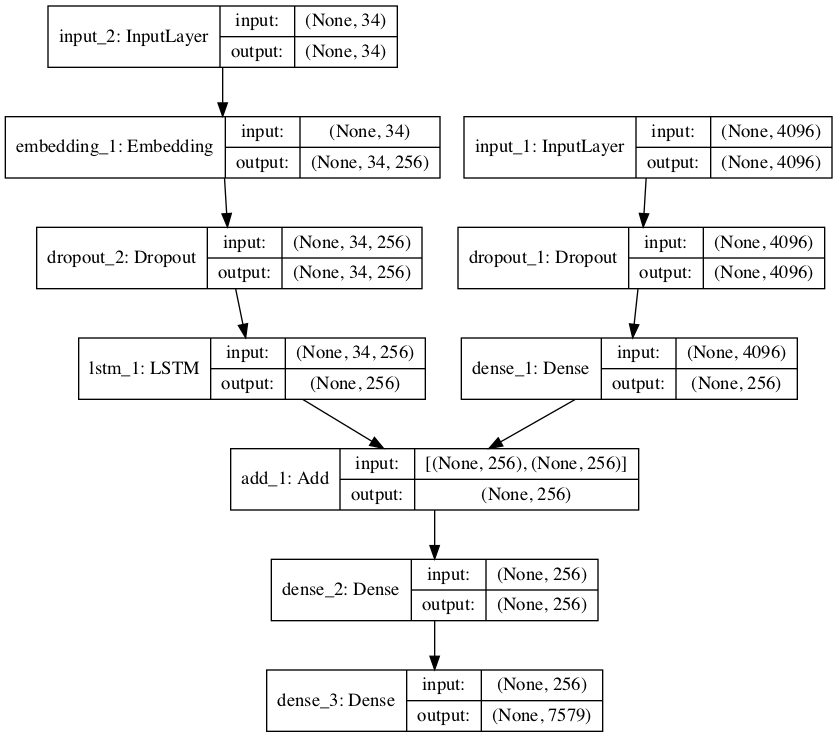

In [0]:
from IPython.display import Image
Image('model.png')

In [17]:
# define the captioning model
def define_model(vocab_size, max_length):
  # feature extractor model
	# define an input of shape (4096,)
  inputs1 = Input(shape=(4096,))
	# Add a dropout layer of 0.5
  fe1 = Dropout(0.5)(inputs1)
	# Add a dense layer of 256 units with relu activation
  fe2 = Dense(256, activation='relu')(fe1)

	# sequence model
	# Define input of shape (max_length,)
  inputs2 = Input(shape=(max_length,))
	# Define an 256 dimension embedding layer with the vocab_size and parameter mark_zero=True
  se1 = Embedding(vocab_size, 256, mask_zero=True)(inputs2)
	# Add a dropout layer of 0.4
  se2 = Dropout(0.5)(se1)
	# Add an LSTM layer with 256 units
  se3 = LSTM(256)(se2)

	# decoder model
	# Add the outputs of feature extractor model and sequence model
  decoder1 = add([fe2, se3])
	# Feed it to a dense layer of 512 units with relu activation
  decoder2 = Dense(512, activation='relu')(decoder1)
	# Add a dense layer with no. of units=vocab_size, and softmax activation
  outputs = Dense(vocab_size, activation='softmax')(decoder2)

	# tie it together and create a model instance which takes input as [image, seq] and gives output as [word]  
  model = Model(inputs=[inputs1, inputs2], outputs=outputs)
  
	# compile model with categorical crossentropy loss and adam optimizer
  model.compile(loss='categorical_crossentropy', optimizer='adam')
	
	# summarize model
  model.summary()
  
	# check if this is same as image provided 
  plot_model(model, to_file='model.png', show_shapes=True)
  return model

# data generator, intended to be used in a call to model.fit()
def data_generator(descriptions, photos, tokenizer, max_length, vocab_size):
	# loop for ever over images
	while 1:
		for key, desc_list in descriptions.items():
			# retrieve the photo feature
			photo = photos[key][0]
			# create the sequences
			in_img, in_seq, out_word = create_sequences(tokenizer, max_length, desc_list, photo, vocab_size)
			yield [in_img, in_seq], out_word

# load training dataset (6K)
filename = root+'Flickr8k_text/Flickr_8k.trainImages.txt'
train = load_set(filename)
print('Dataset: %d' % len(train))
# load clean descriptions for train
train_descriptions = load_clean_descriptions('descriptions.txt', train)
print('Descriptions: train=%d' % len(train_descriptions))

# load photo features for train using pkl file
train_features = load_photo_features('features.pkl', train)
print('Photos: train=%d' % len(train_features))

# prepare tokenizer for train descriptions
tokenizer = create_tokenizer(train_descriptions)
# save the tokenizer
dump(tokenizer, open('tokenizer.pkl', 'wb'))

vocab_size = len(tokenizer.word_index) + 1
print('Vocabulary Size: %d' % vocab_size)
# determine the maximum sequence length of train description
max_length = max_length(train_descriptions)
print('Description Length: %d' % max_length)

# define the model
model = define_model(vocab_size, max_length)
# train the model, run epochs manually and save after each epoch
epochs = 5
steps = len(train_descriptions)
for i in range(epochs):
	# create the data generator
	generator = data_generator(train_descriptions, train_features, tokenizer, max_length, vocab_size)
	# fit for one epoch and verbose 1
	model.fit_generator(generator, epochs=1, steps_per_epoch=steps, verbose=1)
	# save model
	model.save('model_' + str(i) + '.h5')

Dataset: 6000
Descriptions: train=6000
Photos: train=6000
Vocabulary Size: 7579
Description Length: 34
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 34)]         0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 4096)]       0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 34, 256)      1940224     input_3[0][0]                    
__________________________________________________________________________________________________
dropout (Dropout)               (None, 4096)         0           input_2[0][0]          

# 5. Evaluate Model [2 Marks]

In [0]:
from numpy import argmax
from nltk.translate.bleu_score import corpus_bleu

def max_length(descriptions):
	# Convert descriptions to lines
	lines = to_lines(descriptions)
	return max(len(d.split()) for d in lines)
 
# map an integer to a word
def word_for_id(integer, tokenizer):
	for word, index in tokenizer.word_index.items():
		if index == integer:
			return word
	return None

# generate a description for an image
def generate_desc(model, tokenizer, photo, max_length):
	# seed the generation process
	in_text = 'startseq'
	# iterate over the whole length of the sequence
	for i in range(max_length):
		# integer encode input sequence using texts_to_sequences (consider first element)
		sequence = tokenizer.texts_to_sequences([in_text])[0]
		# pad sequence for maxlength
		sequence = pad_sequences([sequence], maxlen=max_length)
		# predict next word using both photo and sequence
		yhat = model.predict([photo,sequence], verbose=0)
		# convert probability to integer
		yhat = argmax(yhat)
		# map integer to word
		word = word_for_id(yhat, tokenizer)
		# stop if we cannot map the word
		if word is None:
			break
		# append as input for generating the next word
		in_text += ' ' + word
		# stop if we predict the end of the sequence
		if word == 'endseq':
			break
	return in_text

# evaluate the skill of the model
def evaluate_model(model, descriptions, photos, tokenizer, max_length):
	# assign empty lists
	actual, predicted = list(), list()
	# step over the whole set
	for key, desc_list in descriptions.items():
		# generate description
		yhat = generate_desc(model, tokenizer, photos[key], max_length)
		# store actual and predicted
		references = [d.split() for d in desc_list]
		actual.append(references)
		predicted.append(yhat.split())
	# calculate BLEU score
	print('BLEU-1: %f' % corpus_bleu(actual, predicted, weights=(1.0, 0, 0, 0)))
	print('BLEU-2: %f' % corpus_bleu(actual, predicted, weights=(0.5, 0.5, 0, 0)))
	print('BLEU-3: %f' % corpus_bleu(actual, predicted, weights=(0.3, 0.3, 0.3, 0)))
	print('BLEU-4: %f' % corpus_bleu(actual, predicted, weights=(0.25, 0.25, 0.25, 0.25)))

# prepare tokenizer on train set

# load training dataset (6K)
filename = root+'Flickr8k_text/Flickr_8k.trainImages.txt'
train = load_set(filename)
print('Dataset: %d' % len(train))
# load clean descriptions for train
train_descriptions = load_clean_descriptions('descriptions.txt', train)
print('Descriptions: train=%d' % len(train_descriptions))
# prepare tokenizer for train descriptions
tokenizer = create_tokenizer(train_descriptions)
vocab_size = len(tokenizer.word_index) + 1
print('Vocabulary Size: %d' % vocab_size)
# determine the maximum sequence length
max_length = max_length(train_descriptions)
print('Description Length: %d' % max_length)

# prepare test set

# load test set
filename = root+'Flickr8k_text/Flickr_8k.testImages.txt'
test = load_set(filename)
print('Dataset: %d' % len(test))
# load clean descriptions for test
test_descriptions = load_clean_descriptions('descriptions.txt', test)
print('Descriptions: test=%d' % len(test_descriptions))
# load photo features for test 
test_features = load_photo_features('features.pkl', test)
print('Photos: test=%d' % len(test_features))

# load the model
filename = 'model_1.h5'
model = load_model(filename)
# evaluate model
#####
evaluate_model(model, test_descriptions, test_features, tokenizer, max_length)

Dataset: 6000
Descriptions: train=6000
Vocabulary Size: 7579
Description Length: 34
Dataset: 1000
Descriptions: test=1000


# 6. Generate new captions [1 Mark]

In [34]:
# extract features from each image in the directory
def extract_features(filename):
	# load the VGG16 model
	model = VGG16()
	# re-structure the model by removing the last layer
	#####
	model.layers.pop()
	model = Model(inputs=model.inputs, outputs=model.layers[-2].output)
	# load the image
	image = load_img(filename, target_size=(224, 224))
	# convert the image pixels to a numpy array
	image = img_to_array(image)
	# reshape data for the model
	image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
	# preprocess the image for the VGG model
	image = preprocess_input(image)
	# get features (output of the model for the image)
	feature = model.predict(image, verbose=0)
	return feature

# load the tokenizer
tokenizer = load(open('tokenizer.pkl', 'rb'))
# pre-define the max sequence length (from training)
max_length = 34
# load the model
model = load_model('model_4.h5')
# load and prepare your own image to generate the caption
photo = extract_features('FootballMatch.jpg')   
# generate description
description = generate_desc(model, tokenizer, photo, max_length)
# provide your image file name 
from IPython.display import Image
Image(filename='FootballMatch.jpg')
print(description)

startseq two men are playing soccer on the grass endseq
